# DAY 1: Download Dataset & Primary Analysis

In [ ]:
#download data from kaggle
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# imputing missing values in num_cols
from sklearn.impute import SimpleImputer
# scaling numeric value in 1-0 range
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer
# Combine the numerical and categorical pipelines
from sklearn.compose import ColumnTransformer

In [ ]:
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")
#hemantk777  721b095dacb7cfa6129768282921b8fb

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemantk777
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 239MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [ ]:
raw_data=pd.read_csv("/content/house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv("/content/house-prices-advanced-regression-techniques/test.csv")

In [ ]:
raw_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
test_data.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  

[2 rows x 80 columns]

In [ ]:
raw_data.shape

(1460, 81)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
raw_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
correlation=raw_data.select_dtypes(include=['number']).corr()
correlation.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id           1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass   0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea     -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual -0.028365    0.032628     0.251646  0.105806     1.000000   

             OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id              0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass     -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage    -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea        -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual    -0.091932   0.572323      0.550684    0.411876    0.239666   

             ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id           ...   -0.029643    -0.000477       0.002889  -0.046635   
MSSubClass   ...   -0.012579    -0.006100      -0.012037  -0.043825   
LotFrontage  ...    0.088521     0.151972       0.010700   0.070029   
LotArea      ...    0.171698     0.084774      -0.018340   0.020423   
OverallQual  ...    0.238923     0.308819      -0.113937   0.030371   

             ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice  
Id              0.001330  0.057044 -0.006242  0.021172  0.000712  -0.021917  
MSSubClass     -0.026030  0.008283 -0.007683 -0.013585 -0.021407  -0.084284  
LotFrontage     0.041383  0.206167  0.003368  0.011200  0.007450   0.351799  
LotArea         0.043160  0.077672  0.038068  0.001205 -0.014261   0.263843  
OverallQual     0.064886  0.065166 -0.031406  0.070815 -0.027347   0.790982  

[5 rows x 38 columns]

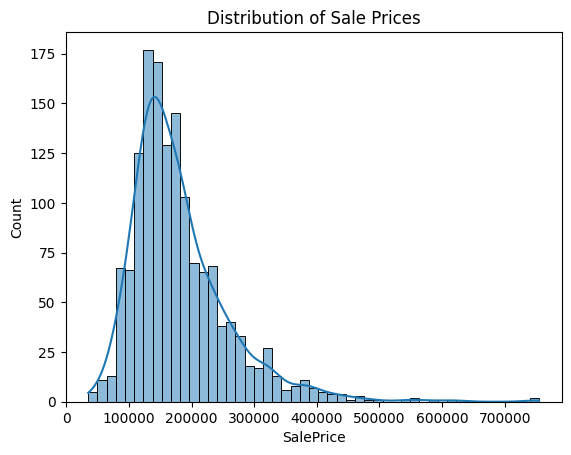

In [ ]:
sns.histplot(raw_data['SalePrice'], kde=True)
plt.title("Distribution of Sale Prices")
###plt.savefig("Distributions of Sale Prices", dpi=300, bbox_inches='tight')                                         # fixes subplot spacing
plt.show()

In [ ]:
# checking missing values
missing_value=raw_data.isna().sum().sort_values(ascending=False).head(20)
#missing_values=[i for i in missing_value]
missing_value

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [ ]:
# See percentage of missing data
((raw_data.isnull().sum() / len(raw_data)) * 100).sort_values(ascending=False).head(10).reset_index()


index          0
0        PoolQC  99.520548
1   MiscFeature  96.301370
2         Alley  93.767123
3         Fence  80.753425
4    MasVnrType  59.726027
5   FireplaceQu  47.260274
6   LotFrontage  17.739726
7    GarageQual   5.547945
8  GarageFinish   5.547945
9    GarageType   5.547945

# DAY 2: Exploratory Data Analysis (EDA)

In [ ]:
#   numeric dataframe and cols   &   catagorical dataframe and cols
num_df=raw_data.select_dtypes(include=['int64','float64'])
num_cols=num_df.columns.tolist()

cat_df=raw_data.select_dtypes(exclude=['int64','float64'])
cat_cols=cat_df.columns.tolist()

num_df.shape[1]


38

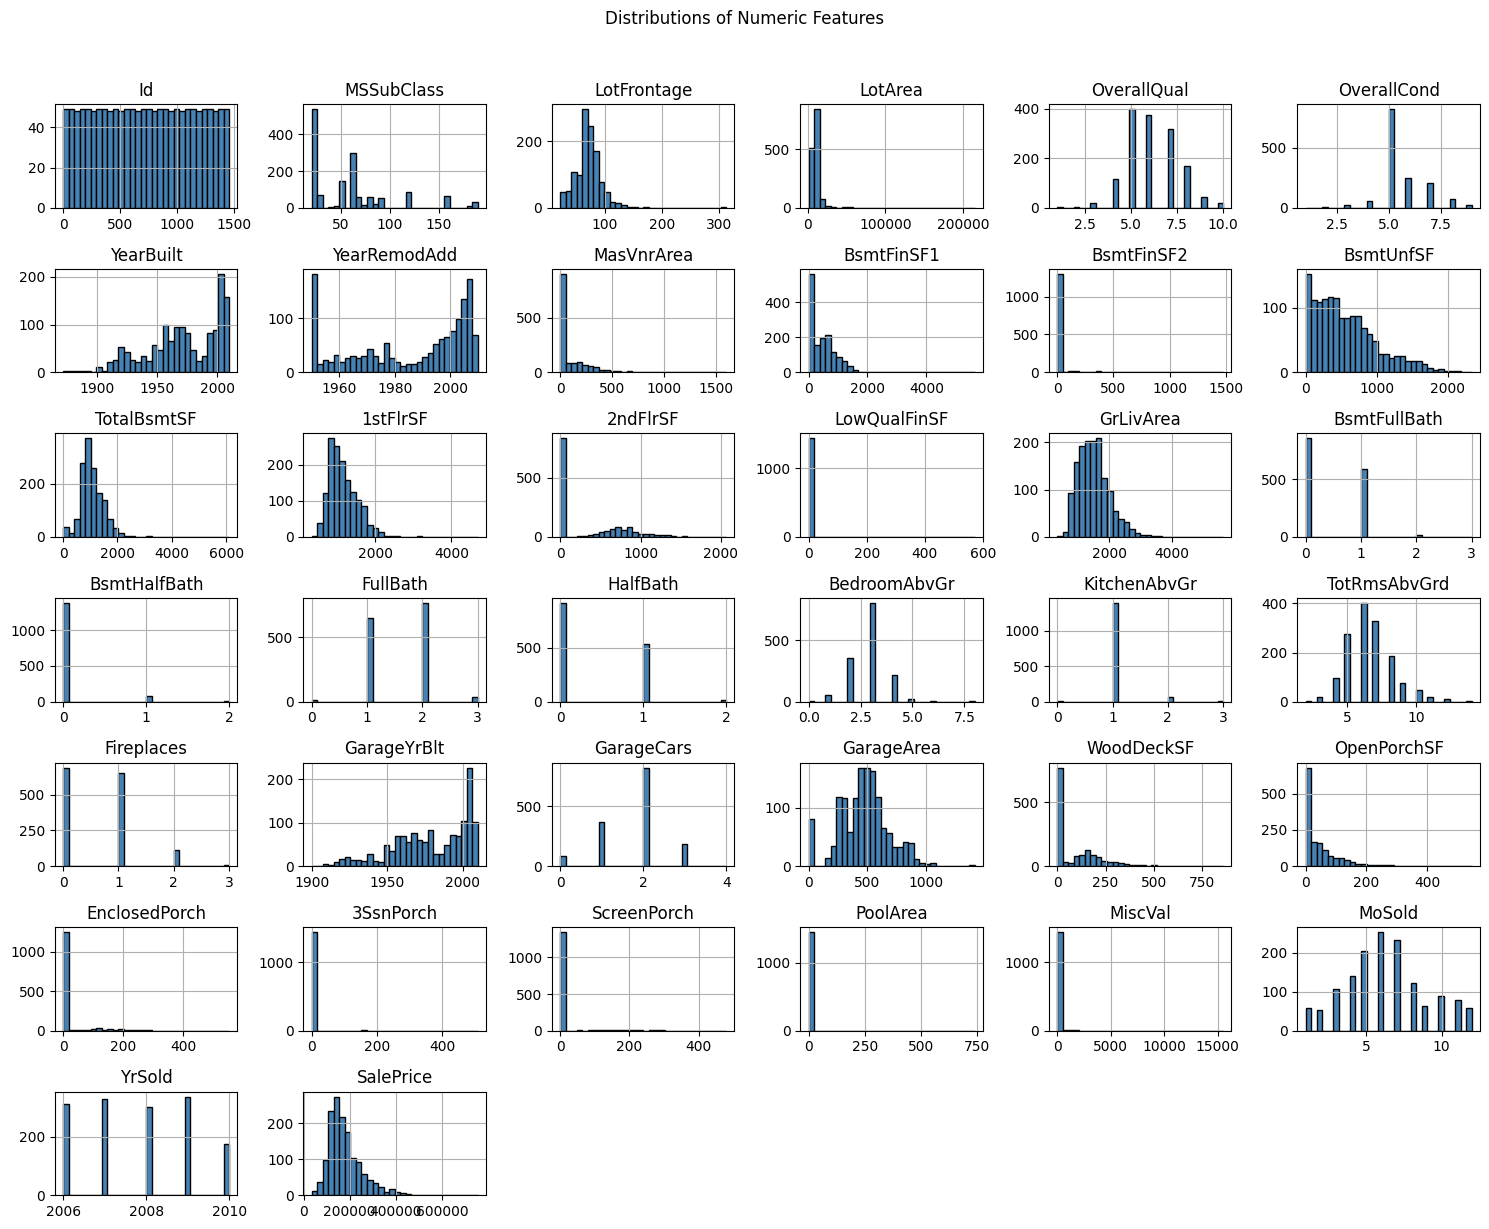

In [ ]:
num_df.hist(
    figsize=(15, 12),
    bins=30,
    color='steelblue',          # change bar colour
    edgecolor='black',
    sharex=False, sharey=False  # independent axes
)
plt.suptitle("Distributions of Numeric Features", y=1.02)  # y moves title up
plt.tight_layout()
###plt.savefig("Distributions of Numeric Features", dpi=300, bbox_inches='tight')                                         # fixes subplot spacing
plt.show()


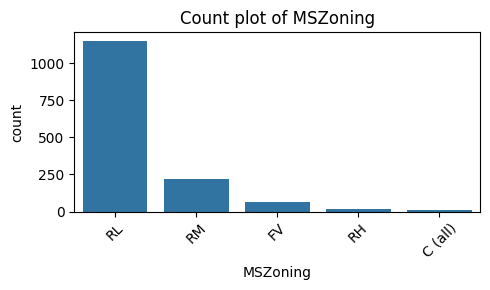

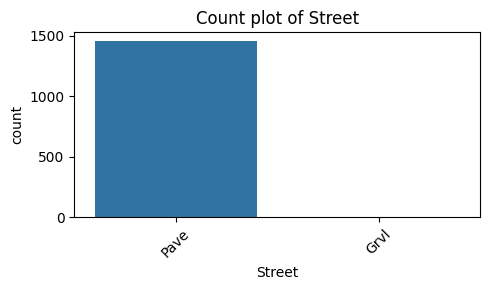

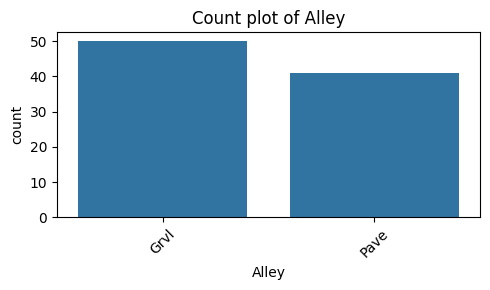

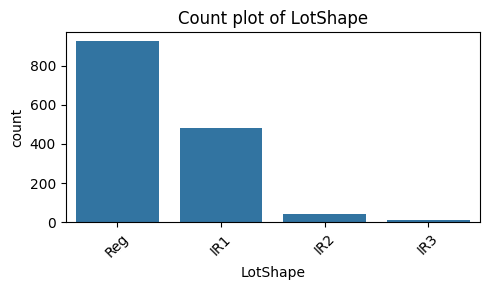

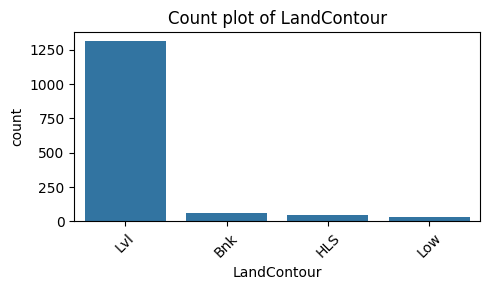

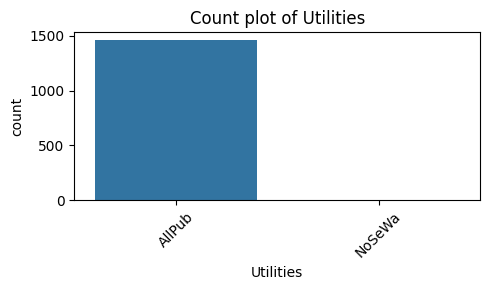

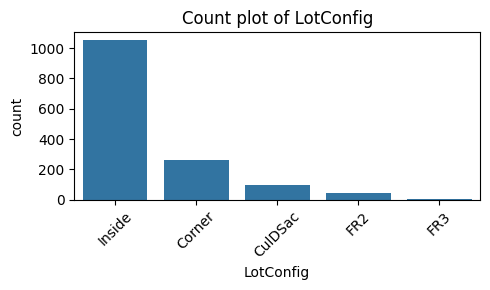

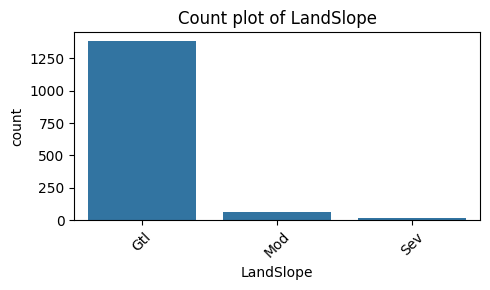

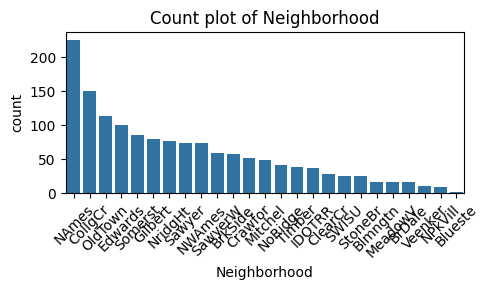

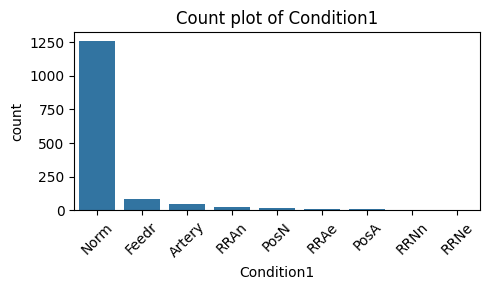

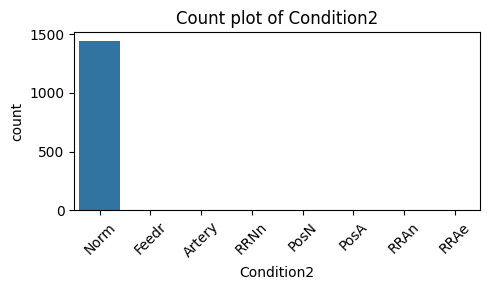

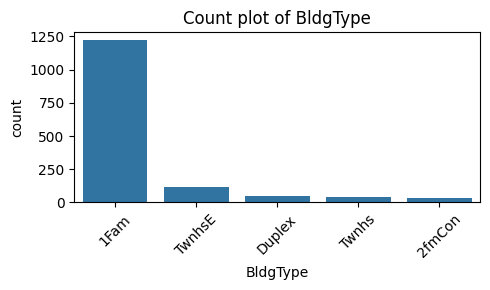

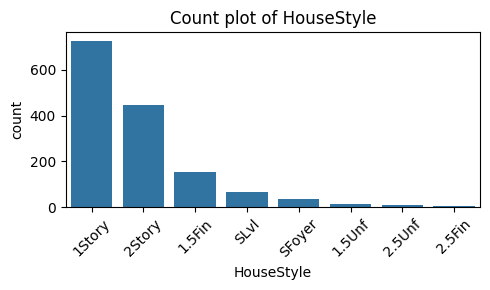

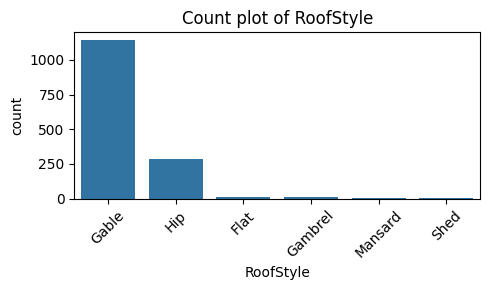

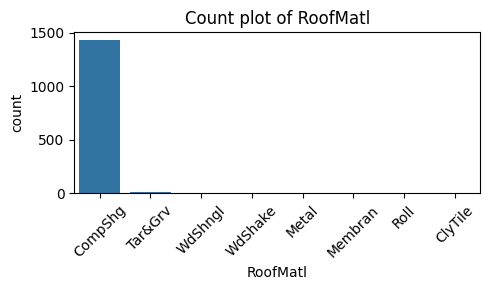

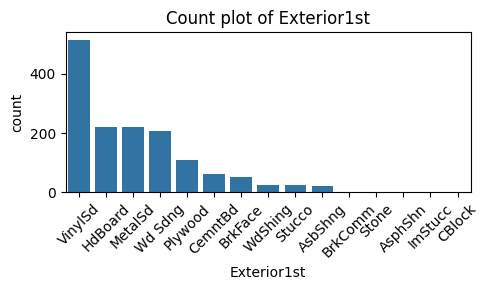

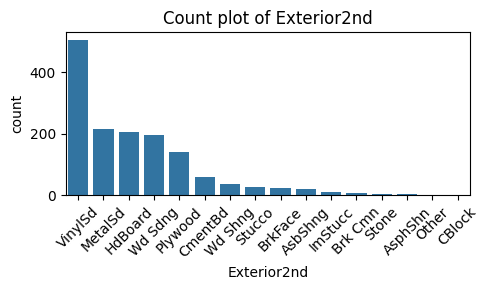

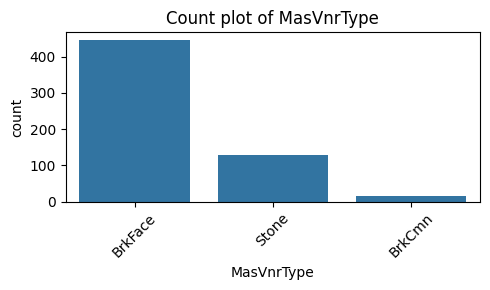

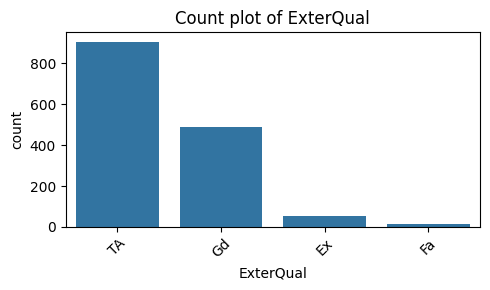

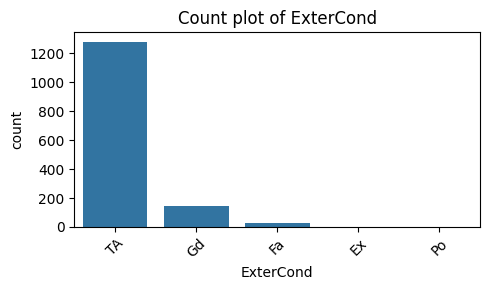

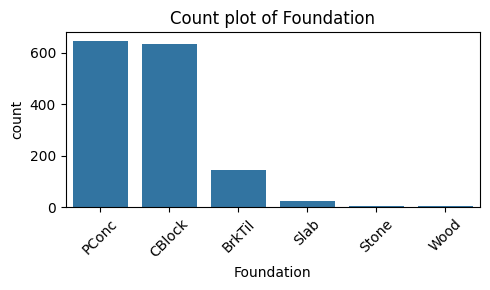

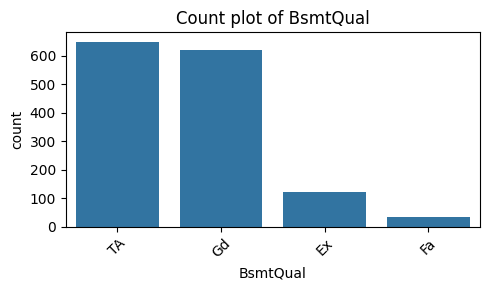

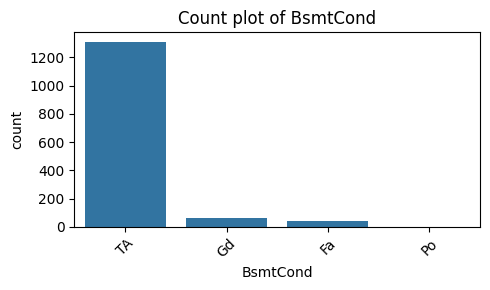

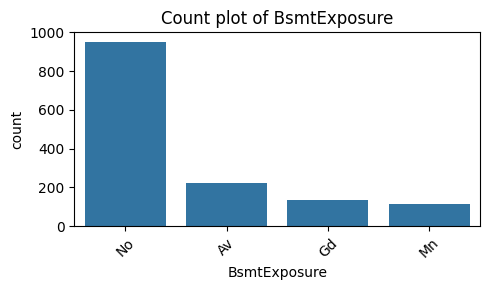

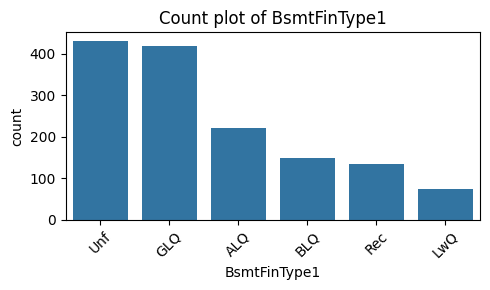

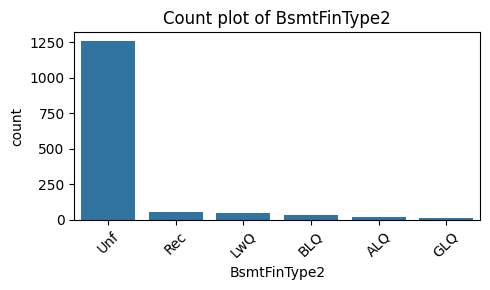

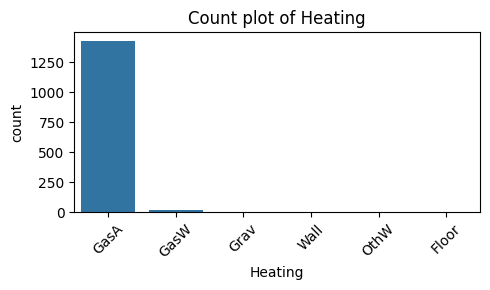

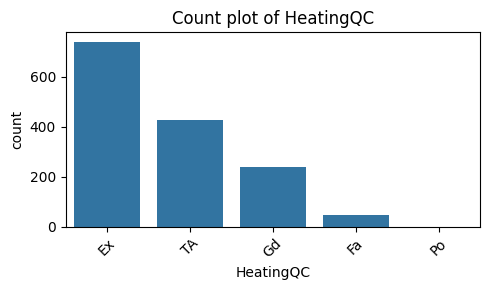

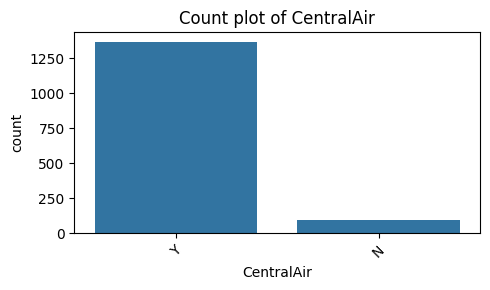

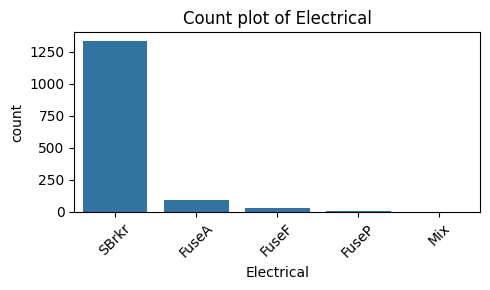

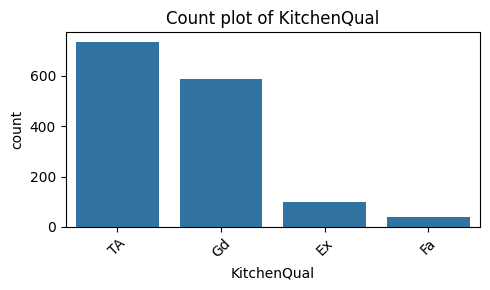

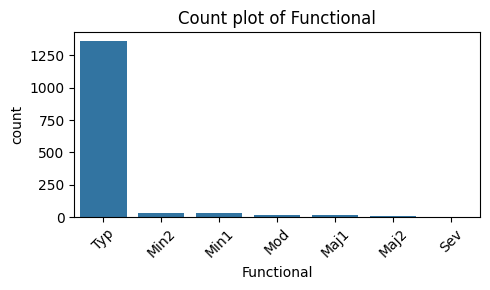

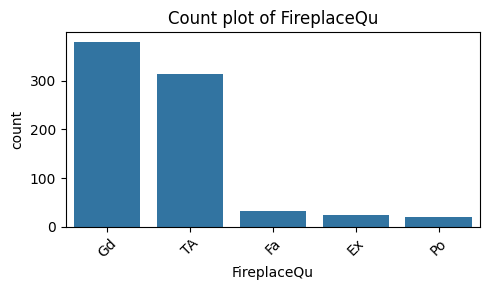

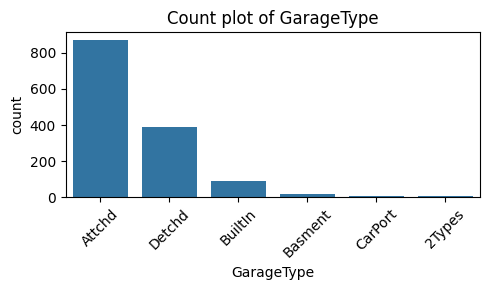

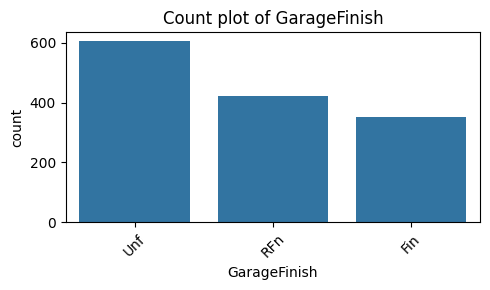

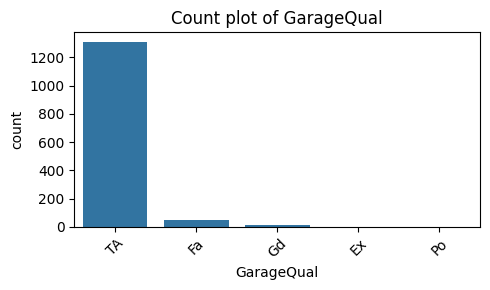

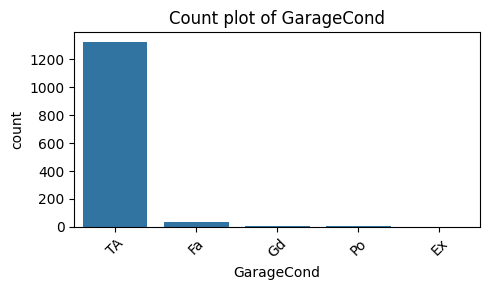

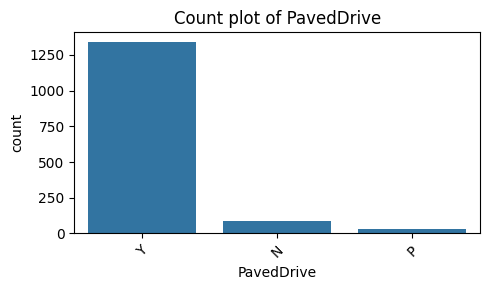

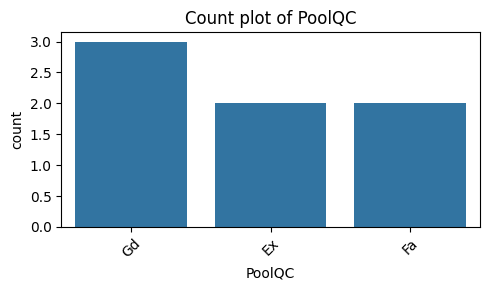

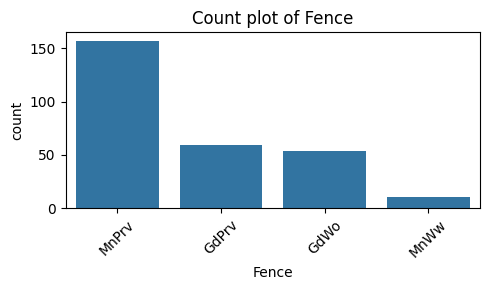

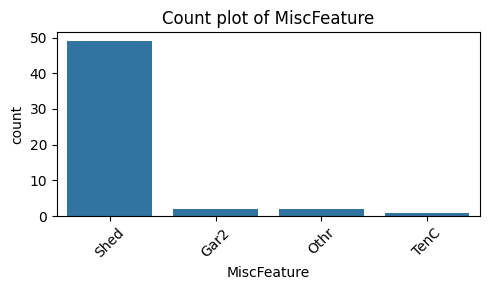

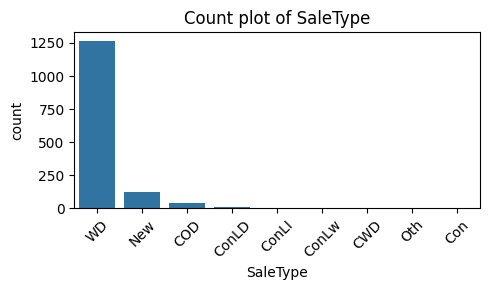

In [ ]:
import os

# Create folder to save plots
###os.makedirs("cat_charts", exist_ok=True)

# Loop through each categorical column
for col in cat_df.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=raw_data, order=raw_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count plot of {col}')
    plt.tight_layout()

    # Save the figure
    ###filename = f"cat_charts/{col}_countplot.png"
    ###plt.savefig(filename, dpi=300, bbox_inches='tight')

    # ✅ Show the plot in the notebook
    plt.show()


## Download a Whole Folder (cat_ chart) from Colab


In [ ]:
#import shutil
# Zip the entire folder (cat_charts becomes cat_charts.zip)
#shutil.make_archive("cat_charts", 'zip', "cat_charts")

In [ ]:
# Check correlation with target
correlation_with_target=correlation.corr()['SalePrice'].sort_values(ascending=False).head(15)
correlation_with_target

SalePrice       1.000000
OverallQual     0.962500
GarageCars      0.903554
GarageArea      0.900257
TotalBsmtSF     0.817396
GrLivArea       0.814702
FullBath        0.811329
MasVnrArea      0.807608
1stFlrSF        0.797333
YearBuilt       0.785608
YearRemodAdd    0.762841
GarageYrBlt     0.756271
Fireplaces      0.731032
TotRmsAbvGrd    0.638194
OpenPorchSF     0.607920
Name: SalePrice, dtype: float64

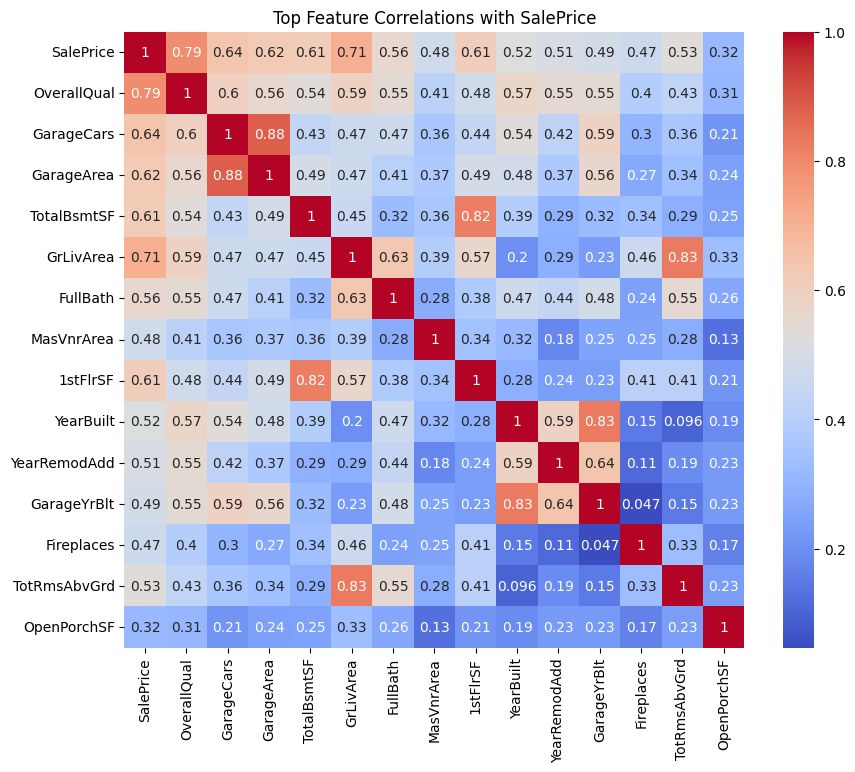

<Figure size 700x300 with 0 Axes>

In [ ]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(raw_data[correlation_with_target.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations with SalePrice")
plt.figure(figsize=(7, 3))
###plt.savefig("Top Feature Correlations with SalePrice", dpi=300, bbox_inches='tight')
plt.show()


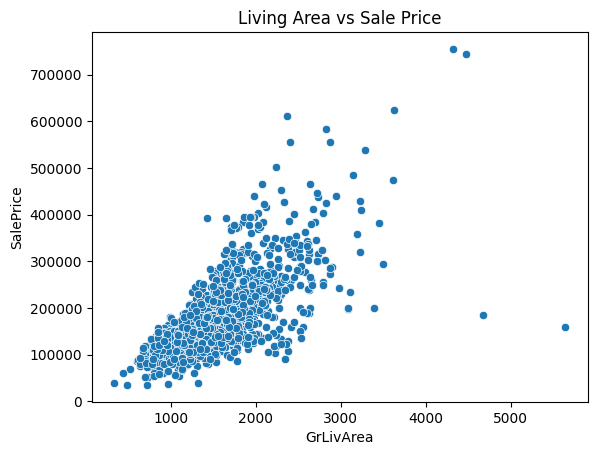

In [ ]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=raw_data)
plt.title("Living Area vs Sale Price")
###plt.savefig("Living Area vs Sale Price", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
sns.boxplot(x='OverallQual', y='SalePrice', data=raw_data)
plt.title("overall quality vs sale price")
###plt.savefig("overall quality vs sale price1", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Sort largest living areas to see if prices are aligned
raw_data.sort_values('GrLivArea', ascending=False)[['GrLivArea', 'SalePrice']].head(10)


GrLivArea  SalePrice
1298       5642     160000
523        4676     184750
1182       4476     745000
691        4316     755000
1169       3627     625000
185        3608     475000
304        3493     295000
1268       3447     381000
635        3395     200000
769        3279     538000

# Day 3: Data Cleaning & Preprocessing

In [ ]:
raw_data.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
dtype: int64

In [ ]:
#Drop Columns with Too Many Missing Values  Columns like [PoolQC, Alley, Fence, MiscFeature] have too many NAs.
raw_data=raw_data.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu","MasVnrType"]).copy()

In [ ]:
raw_data.shape

(1460, 75)

In [ ]:
# imputing / filling missing values in num_cols
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median').fit(raw_data[num_cols])
raw_data[num_cols]=imputer.transform(raw_data[num_cols])

In [ ]:
raw_data[num_cols].isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
# for removing cols name i.e already drop in prev step['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

to_remove = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
cat_cols = [col for col in cat_cols if col not in to_remove]
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
## imputing / filling missing values in cat_cols
raw_data[cat_cols] = raw_data[cat_cols].fillna(raw_data[cat_cols].mode().iloc[0])

In [ ]:
# encode categorical cols in one hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(raw_data[cat_cols])
encoded_cols=list(encoder.get_feature_names_out(cat_cols))    # cols name for encoded cols
raw_data[encoded_cols]=encoder.transform(raw_data[cat_cols])

/tmp/ipython-input-32-7756233.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  raw_data[encoded_cols]=encoder.transform(raw_data[cat_cols])
/tmp/ipython-input-32-7756233.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  raw_data[encoded_cols]=encoder.transform(raw_data[cat_cols])
/tmp/ipython-input-32-7756233.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [ ]:
raw_data[encoded_cols].shape

(1460, 230)

In [ ]:
#combine num and cat cols
raw_data_new=raw_data[num_cols + encoded_cols]
raw_data_new

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          8.0   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1455  1456.0        60.0         62.0   7917.0          6.0          5.0   
1456  1457.0        20.0         85.0  13175.0          6.0          6.0   
1457  1458.0        70.0         66.0   9042.0          7.0          9.0   
1458  1459.0        20.0         68.0   9717.0          5.0          6.0   
1459  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0        2003.0        2003.0       196.0       706.0  ...             0.0   
1        1976.0        1976.0         0.0       978.0  ...             0.0   
2        2001.0        2002.0       162.0       486.0  ...             0.0   
3        1915.0        1970.0         0.0       216.0  ...             0.0   
4        2000.0        2000.0       350.0       655.0  ...             0.0   
...         ...           ...         ...         ...  ...             ...   
1455     1999.0        2000.0         0.0         0.0  ...             0.0   
1456     1978.0        1988.0       119.0       790.0  ...             0.0   
1457     1941.0        2006.0         0.0       275.0  ...             0.0   
1458     1950.0        1996.0         0.0        49.0  ...             0.0   
1459     1965.0        1965.0         0.0       830.0  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          1.0                    1.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1455           0.0           0.0          1.0                    0.0   
1456           0.0           0.0          1.0                    0.0   
1457           0.0           0.0          1.0                    0.0   
1458           0.0           0.0          1.0                    0.0   
1459           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
1455                   1.0    

In [ ]:
#Check Skewness & Fix It (Shrinks big numbers so outliers don’t dominate)
from scipy.stats import skew
import numpy as np

numeric_feats = raw_data_new.select_dtypes(include=['int64', 'float64']).columns
skewed_feats = raw_data_new[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewed_feats[skewed_feats > 0.75]

raw_data_new[high_skew.index] = np.log1p(raw_data[high_skew.index])

/tmp/ipython-input-35-4040011103.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_new[high_skew.index] = np.log1p(raw_data[high_skew.index])


In [ ]:
raw_data[high_skew.index].head(2)

Condition2_RRAn  Exterior1st_CBlock  Exterior1st_ImStucc  \
0              0.0                 0.0                  0.0   
1              0.0                 0.0                  0.0   

   Exterior2nd_CBlock  RoofMatl_Membran  Exterior1st_AsphShn  Functional_Sev  \
0                 0.0               0.0                  0.0             0.0   
1                 0.0               0.0                  0.0             0.0   

   RoofMatl_Roll  RoofMatl_ClyTile  HeatingQC_Po  ...  GrLivArea  \
0            0.0               0.0           0.0  ...     1710.0   
1            0.0               0.0           0.0  ...     1262.0   

   GarageFinish_Fin  GarageType_Detchd  BsmtFinType1_GLQ  GarageFinish_RFn  \
0               0.0                0.0               1.0               1.0   
1               0.0                0.0               0.0               1.0   

   BsmtUnfSF  HeatingQC_TA  HouseStyle_2Story  2ndFlrSF  BsmtFinType1_Unf  
0      150.0           0.0                1.0     854.0               0.0  
1      284.0           0.0                0.0       0.0               0.0  

[2 rows x 212 columns]

In [ ]:
#  remove hasgtag for file saving
# raw_data.to_csv("cleaned_train.csv", index=False)


# Day 4 – Model Training & Evaluation

In [ ]:
cat_df.shape

(1460, 43)

In [ ]:
x=raw_data_new.drop("SalePrice",axis=1)
y=raw_data_new['SalePrice']
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#                    LinearRegression
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#                    RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

#                    XGBRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Evaluate Models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, x_test, y_test):
    preds = model.predict(x_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return mae, rmse, r2

print("Linear Regression:", evaluate(lr, x_test, y_test))
print("Random Forest:", evaluate(rf, x_test, y_test))
print("XGBoost:", evaluate(xgb, x_test, y_test))


Linear Regression: (0.0850241654097917, np.float64(0.12473866508045821), 0.9166194087298817)
Random Forest: (0.09954020550973569, np.float64(0.1461293200628315), 0.8855706282707052)
XGBoost: (0.0962152481756046, np.float64(0.14639774235303432), 0.8851498557072368)


In [ ]:
#Save the Best Model
import joblib
joblib.dump(xgb, "xgb_model.pkl")

['xgb_model.pkl']

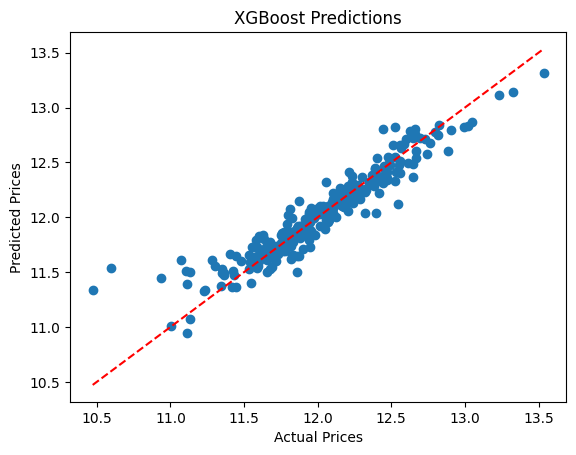

In [ ]:
#Plot Prediction vs Actual
import matplotlib.pyplot as plt

plt.scatter(y_test, xgb.predict(x_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
###plt.savefig("plot Prediction vs Actual", dpi=300, bbox_inches='tight')
plt.show()


# Day 5 – Advanced ML Concepts & Interpretability

## Model Explainability with SHAP & LIME
 *Use for model transparency and stakeholder trust.*

In [ ]:
#     Model Explainability with SHAP & LIME
import shap
explainer = shap.Explainer(xgb)          # Use trained model
shap_values = explainer(x_test)

In [ ]:
shap.plots.backend = "matplotlib"   # Use matplotlib backend for plots

In [ ]:
shap.plots.beeswarm(shap_values, show=False) # Global importance
plt.title("SHAP Global Feature Importance")
plt.tight_layout()
plt.savefig("shap_beeswarm_plot.png", dpi=300, bbox_inches='tight')
plt.show()


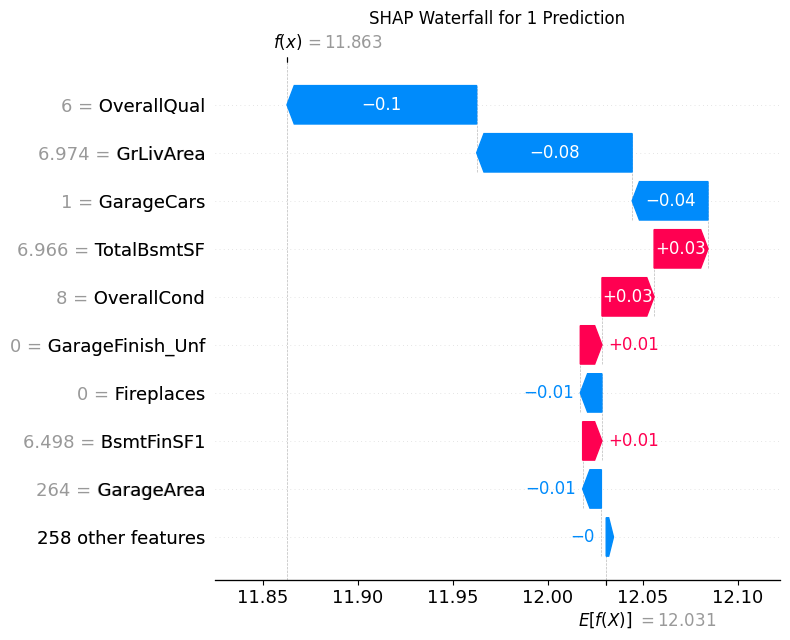

In [ ]:
shap.plots.waterfall(shap_values[0], show=False)  # Single prediction breakdown
plt.title("SHAP Waterfall for 1 Prediction")
plt.tight_layout()
plt.savefig("shap_waterfall_plot.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=97b9829fa9bfd67bba9c4903a607e955339fad95cf2ec934c799fc74af3ba765
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=x_train.columns,
    mode='regression'
)

exp = explainer.explain_instance(x_test.iloc[0].values, xgb.predict)
exp.show_in_notebook()


## 2. Feature Drift / Data Drift (Basics)
| Type          | Description                            | Tool                   |
| ------------- | -------------------------------------- | ---------------------- |
| Feature Drift | Feature distribution changes over time | `evidently`, `whylogs` |
| Data Drift    | Overall change in data pattern         | `scipy.stats.ks_2samp` |

Use this to monitor real-world performance.

In [ ]:
# Simulate X_new (for practice)
import pandas as pd
import numpy as np

# Simulate new data by adding noise to training data
x_new = x_train.copy()
x_new["GrLivArea"] = x_new["GrLivArea"] * np.random.normal(1.1, 0.1, size=len(x_new))


In [ ]:
from scipy.stats import ks_2samp

# Compare training vs new production feature
ks_2samp(x_train["GrLivArea"], x_new["GrLivArea"])

KstestResult(statistic=np.float64(0.523972602739726), pvalue=np.float64(8.090856241315657e-147), statistic_location=np.float64(7.738923757439457), statistic_sign=np.int8(1))

In [ ]:
from scipy.stats import ks_2samp

stat, p = ks_2samp(x_train["GrLivArea"], x_new["GrLivArea"])
print(f"p-value: {p}")

if p < 0.05:
    print("⚠️ Drift detected!")
else:
    print("✅ No significant drift.")


p-value: 8.090856241315657e-147
⚠️ Drift detected!


##  LightGBM vs XGBoost (Compare)
| Feature              | XGBoost | LightGBM            |
| -------------------- | ------- | ------------------- |
| Accuracy             | High    | Similar (or better) |
| Speed                | Slower  | 🚀 Faster           |
| Handles missing?     | ✅ Yes   | ✅ Yes               |
| Categorical encoding | Manual  | ✅ Native support    |

Use LightGBM for faster training with large datasets.

In [ ]:
#                    LGBMRegressor(LightBGM)
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3421
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 168
[LightGBM] [Info] Start training from score 12.030658


LGBMRegressor()

In [ ]:
print("LightBGM:", evaluate(lgb_model, x_test, y_test))    # best score than xgb

LightBGM: (0.09309558245746868, np.float64(0.14176197849007427), 0.8923082788566208)


In [ ]:
#Save the Model
import joblib
joblib.dump(lgb_model, "lgb_model.pkl")

['lgb_model.pkl']

## Ensemble Stacking
Combine 2 models (LightBGM, XGB)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge


stack = StackingRegressor(
    estimators=[
        ("lgb_model",lgb_model),
        ("xgb",xgb)
    ],
    final_estimator=Ridge()
)
stack.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3421
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 168
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3201
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 160
[LightGBM] [Info] Start training from score 12.029314
[LightGBM] [Warning] Found 

StackingRegressor(estimators=[('lgb_model', LGBMRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=Ridge())

In [ ]:
print("Stack:", evaluate(stack, x_test, y_test))     # slightly better than LightBGM

Stack: (0.09143134731505265, np.float64(0.14030200584085567), 0.8945150390563628)


## 📈 Future Improvements

- Feature engineering: polynomial features, feature selection
- Hyperparameter tuning with Optuna or GridSearchCV
- Streamlit-based web app deployment

## Author
Hemant K  
📧 hemant777.karpe@gmail.com
🔗 [LinkedIn](https://www.linkedin.com/in/hemant-karpe)